#    Lenet-5 Architecture Implementation

Import all the  required dependencies 

In [1]:
from keras.models import Sequential
from keras.layers import Dense, Activation,Conv2D,Flatten,Input
from keras.layers.pooling import MaxPool2D

Using TensorFlow backend.


# Data Set Preparation and Pre-Processing

In [2]:
# Data Set Preparation
from keras.datasets import mnist
from keras.utils import np_utils
(train_data,train_label),(test_data,test_label)=mnist.load_data(path='/mnist.npz')

# Reshape and Make the Data Ready 
numPixels=train_data.shape[1]*train_data.shape[2]
Ntrain=train_data.shape[0]
Ntest=test_data.shape[0]


# Normalise the Data
train_data=train_data/255
test_data=test_data/255

# Convert Labels into One hot Encoded Vector
train_label = np_utils.to_categorical(train_label)
test_label = np_utils.to_categorical(test_label)
numclasses = test_label.shape[1]


# Reshape the data so that it can fed into Deep Learning Model
train_data=train_data.reshape(Ntrain,28,28,1).astype('float32')
test_data=test_data.reshape(Ntest,28,28,1).astype('float32')


#Sanity Check 
print('Shape of Trainning Data',train_data.shape)
print('Shape of Trainning Label',train_label.shape)
print('Shape of Testing Data',test_data.shape)
print('Shape of Testing Label',test_label.shape)

run=False

Shape of Trainning Data (60000, 28, 28, 1)
Shape of Trainning Label (60000, 10)
Shape of Testing Data (10000, 28, 28, 1)
Shape of Testing Label (10000, 10)


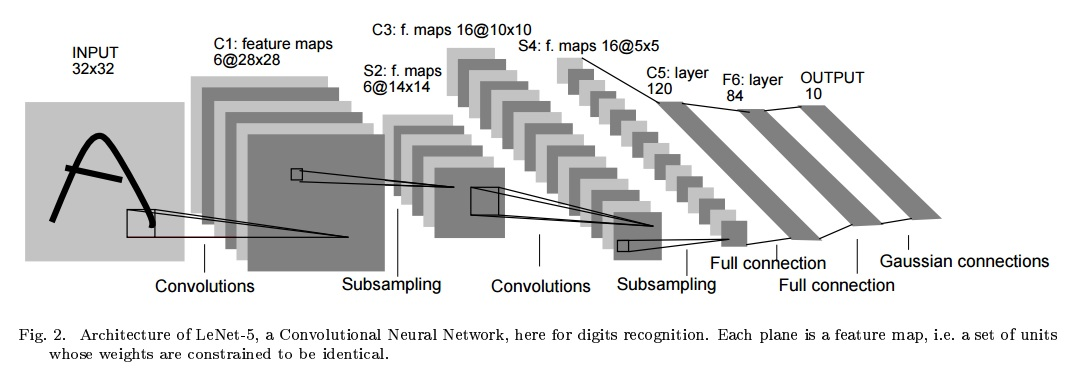

In [3]:
from IPython.display import Image
Image("Lenet5-Architecture.jpg")

In [4]:
model = Sequential()
model.add(Conv2D(batch_input_shape=(None,28,28,1),kernel_size=[5,5],filters=6))
model.add(MaxPool2D(pool_size=2, strides=2, padding='valid'))
model.add(Conv2D(kernel_size=[5,5],filters=16))
model.add(MaxPool2D(pool_size=2,strides=2,padding='valid'))
model.add(Flatten())
model.add(Dense(units=120,activation='sigmoid'))
model.add(Dense(units=84,activation='sigmoid'))
model.add(Dense(units=10,activation='softmax'))

In [5]:
# Sanity Check for Model Definition and Layers
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 24, 24, 6)         156       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 6)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 16)          2416      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 120)               30840     
_________________________________________________________________
dense_2 (Dense)              (None, 84)                10164     
__________

# Set Optimizer, Loss and Metrics

In [6]:
if run==True:
    model_saved_weights=model.load_weights(filepath='mnist_lenet_weights.h5')
    model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'],sample_weight_mode=model_saved_weights)
else:
    model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
    run=True


In [7]:
model.fit(train_data, train_label,batch_size=64,epochs=10,verbose=1,validation_data=(test_data, test_label))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 28s - loss: 0.4202 - acc: 0.8912 - val_loss: 0.1188 - val_acc: 0.9657
Epoch 2/10
60000/60000 [==============================] - 28s - loss: 0.0983 - acc: 0.9717 - val_loss: 0.0729 - val_acc: 0.9789
Epoch 3/10
60000/60000 [==============================] - 28s - loss: 0.0666 - acc: 0.9801 - val_loss: 0.0570 - val_acc: 0.9830
Epoch 4/10
60000/60000 [==============================] - 27s - loss: 0.0515 - acc: 0.9847 - val_loss: 0.0467 - val_acc: 0.9851
Epoch 5/10
60000/60000 [==============================] - 27s - loss: 0.0415 - acc: 0.9876 - val_loss: 0.0478 - val_acc: 0.9835
Epoch 6/10
60000/60000 [==============================] - 30s - loss: 0.0348 - acc: 0.9897 - val_loss: 0.0423 - val_acc: 0.9857
Epoch 7/10
60000/60000 [==============================] - 33s - loss: 0.0284 - acc: 0.9911 - val_loss: 0.0425 - val_acc: 0.9875
Epoch 8/10
60000/60000 [==============================

In [8]:
# Compute the Performance of the Model
loss,accuracy=model.evaluate(test_data,test_label,batch_size=1000,verbose=1)
print("Accuracy:",accuracy*100,'%')

10000/10000 [==============================] - 1s     
Accuracy: 98.3900004625 %


# Save the model for Future Reuse

In [9]:
# Save Trained Model for Future Use.
import h5py
model.save('mnist_lenet.h5')
model.save_weights('mnist_lenet_weights.h5')